In [ ]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 5.7 MB/s eta 0:00:00


In [ ]:
# Importações
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from collections import Counter
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline as Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, QuantileTransformer, MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from feature_engine.outliers import Winsorizer

In [ ]:
# É necessário ter o arquivo "trabalho2_dados_grupo-08.csv" no ambiente do colab
db = pd.read_csv("trabalho2_dados_grupo-08.csv")

# Conhecendo os Dados (1)

In [ ]:
db.head()

,Candidate ID,Name,Number of characters in Original Name,Month of Birth,Year of Birth,Gender,State (Location),10th percentage,12th percentage,10th Completion Year,...,Quantitative Ability 3,Quantitative Ability 4,Domain Skills 1,Domain Skills 2,Domain Test 3,Domain Test 4,Analytical Skills 1,Analytical Skills 2,Analytical Skills 3,Performance
0,1131,PtS,13,FEB,Y7,A,N,83.80,84.00,Y13,...,65.363128,63.005780,48.2142857142857,68.345324,68.275862,59.124088,90.9090909090909,81.012658,95.402299,BP
1,130,AyS,11,NOV,Y7,B,D,84.40,77.00,Y14,...,56.424581,65.317919,50,66.906475,68.275862,60.583942,67.2727272727273,88.607595,56.321839,BP
2,882,CiK,13,MAR,Y8,B,N,86.26,62.83,Y14,...,50.837989,52.601156,46.4285714285714,56.834532,72.413793,64.963504,60,79.746835,32.183908,BP
3,28,AhS,12,MAR,Y8,A,F,81.00,72.00,Y14,...,55.307263,56.069364,35.7142857142857,53.956835,71.034483,50.364964,47.2727272727273,73.417722,35.632184,BP
4,239,MnV,25,NOV,Y7,A,E,62.92,68.00,Y14,...,38.547486,61.849711,19.6428571428571,39.568345,43.448276,62.043796,45.4545454545455,60.759494,40.229885,BP


In [ ]:
db.shape

(469, 31)

In [ ]:
db.describe()

,Candidate ID,Number of characters in Original Name,10th percentage,12th percentage,College percentage,English 1,English 2,English 3,English 4,Quantitative Ability 2,Quantitative Ability 3,Quantitative Ability 4,Domain Skills 2,Domain Test 3,Domain Test 4,Analytical Skills 2,Analytical Skills 3
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,716.976546,13.176972,83.215991,80.515053,72.633198,50.424428,70.085424,65.981779,66.943111,63.289200,60.821193,62.555924,69.049409,62.045438,68.516645,71.083102,62.314046
std,403.041287,3.179230,6.841820,8.937947,7.067401,16.646622,10.728110,11.655084,11.220116,11.679166,10.986086,10.941985,13.965125,13.333236,12.733411,12.815698,17.220136
min,9.000000,8.000000,62.920000,61.000000,55.960000,13.207547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.113924,9.195402
25%,387.000000,11.000000,79.060000,74.200000,67.200000,39.622642,63.057325,58.787879,59.509202,55.688623,55.307263,54.913295,59.712230,54.482759,62.043796,62.025316,50.574713
50%,737.000000,12.000000,84.400000,80.800000,72.240000,49.056604,68.152866,64.848485,66.871166,62.874251,60.893855,61.849711,71.223022,61.379310,69.343066,72.151899,63.218391
75%,1066.000000,15.000000,88.200000,88.200000,77.700000,60.377358,77.070064,73.333333,74.233129,71.257485,67.597765,67.630058,78.417266,71.034483,76.642336,81.012658,75.862069
max,1418.000000,27.000000,96.600000,97.600000,92.700000,100.000000,97.452229,100.000000,100.000000,100.000000,100.000000,94.219653,100.000000,97.241379,95.620438,96.202532,100.000000


In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Candidate ID                           469 non-null    int64  
 1   Name                                   469 non-null    object 
 2   Number of characters in Original Name  469 non-null    int64  
 3   Month of Birth                         469 non-null    object 
 4   Year of Birth                          469 non-null    object 
 5   Gender                                 469 non-null    object 
 6   State (Location)                       469 non-null    object 
 7    10th percentage                       469 non-null    float64
 8    12th percentage                       469 non-null    float64
 9   10th Completion Year                   469 non-null    object 
 10  12th Completion year                   469 non-null    object 
 11  Degree

In [ ]:
# Removendo espaços extras no início dos nomes das colunas
db.columns = [col.strip() for col in db.columns]
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Candidate ID                           469 non-null    int64  
 1   Name                                   469 non-null    object 
 2   Number of characters in Original Name  469 non-null    int64  
 3   Month of Birth                         469 non-null    object 
 4   Year of Birth                          469 non-null    object 
 5   Gender                                 469 non-null    object 
 6   State (Location)                       469 non-null    object 
 7   10th percentage                        469 non-null    float64
 8   12th percentage                        469 non-null    float64
 9   10th Completion Year                   469 non-null    object 
 10  12th Completion year                   469 non-null    object 
 11  Degree

# Pré-processamento (1)

## Base Preprocessing

In [ ]:
# Dados duplicados
print(db.duplicated().sum())
print(db.shape)
db = db.drop_duplicates()
print(db.duplicated().sum())
print(db.shape)

86
(469, 31)
0
(383, 31)


In [ ]:
# Valores ausentes
md_count = (db == "MD").sum()
# Verificação de valores ausentes por coluna
for column, quantity in md_count.items():
  if quantity > 0:
    print(f"{column}: {quantity}")

Quantitative Ability 1: 4
Domain Skills 1: 2
Analytical Skills 1: 6
Performance: 14


In [ ]:
# Tratamento para a variável Performance - remover linhas com Performance ausente
db = db[db['Performance'] != 'MD']
db.shape

(369, 31)

In [ ]:
db = db.replace("MD", np.nan)

In [ ]:
# Valores ausentes
md_count = db.isnull().sum()
# Verificação de valores ausentes por coluna
for column, quantity in md_count.items():
  if quantity > 0:
    print(f"{column}: {quantity}")

Quantitative Ability 1: 4
Domain Skills 1: 2
Analytical Skills 1: 6


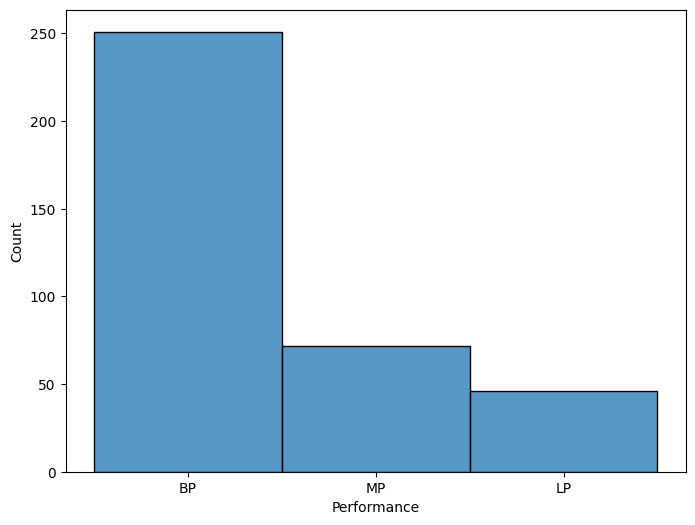

In [ ]:
# Deseja-se montar modelos que separem as instâncias com LP das instâncias com BP e MP
# Ou seja, LP será 1 e BP+MP será 0

# Distribuição de Performance
plt.figure(figsize=(8, 6))
sns.histplot(db.Performance)
plt.show()

In [ ]:
db.Performance = db.Performance.replace(["BP", "MP"], 0).infer_objects(copy=False)
db.Performance = db.Performance.replace(["LP"], 1).infer_objects(copy=False)

db.Performance.value_counts()

/tmp/ipython-input-530045142.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  db.Performance = db.Performance.replace(["LP"], 1).infer_objects(copy=False)


,count
Performance,
0,323
1,46


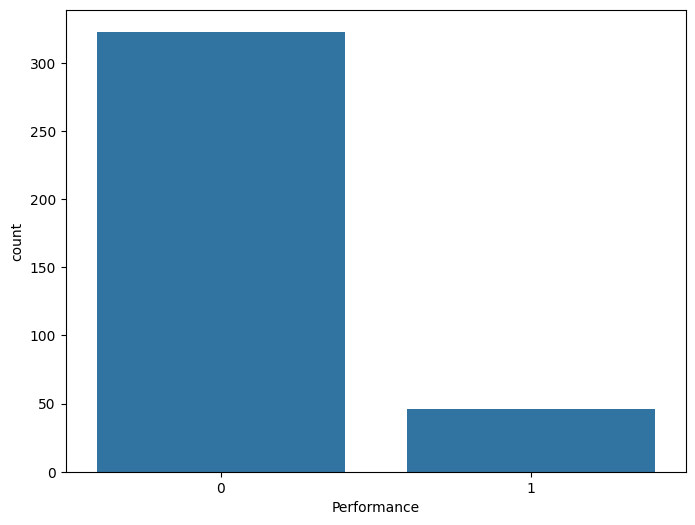

In [ ]:
# Nova distribuição de Performance
plt.figure(figsize=(8, 6))
sns.countplot(x=db.Performance.astype("category"))
plt.show()

In [ ]:
# Encoding Month of Birth as cyclical continuous feature
db["Month of Birth"].value_counts()

,count
Month of Birth,
DEC,40
MAR,38
JAN,37
NOV,36
MAY,35
JUL,32
FEB,28
OCT,28
AUG,26


In [ ]:
# Encoding Month of Birth as cyclical continuous feature
month_map = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
db['Month of Birth'] = db["Month of Birth"].map(month_map)

months_in_year = 12

# Apply cyclical feature transformation
db['sin_MOB'] = np.sin(2 * np.pi * db["Month of Birth"] / months_in_year)
db['cos_MOB'] = np.cos(2 * np.pi * db["Month of Birth"] / months_in_year)

db.drop(columns=["Month of Birth"], axis=1, inplace=True)
db.head()

,Candidate ID,Name,Number of characters in Original Name,Year of Birth,Gender,State (Location),10th percentage,12th percentage,10th Completion Year,12th Completion year,...,Domain Skills 1,Domain Skills 2,Domain Test 3,Domain Test 4,Analytical Skills 1,Analytical Skills 2,Analytical Skills 3,Performance,sin_MOB,cos_MOB
0,1131,PtS,13,Y7,A,N,83.80,84.00,Y13,Y15,...,48.2142857142857,68.345324,68.275862,59.124088,90.9090909090909,81.012658,95.402299,0,0.866025,5.000000e-01
1,130,AyS,11,Y7,B,D,84.40,77.00,Y14,Y16,...,50,66.906475,68.275862,60.583942,67.2727272727273,88.607595,56.321839,0,-0.500000,8.660254e-01
2,882,CiK,13,Y8,B,N,86.26,62.83,Y14,Y16,...,46.4285714285714,56.834532,72.413793,64.963504,60,79.746835,32.183908,0,1.000000,6.123234e-17
3,28,AhS,12,Y8,A,F,81.00,72.00,Y14,Y16,...,35.7142857142857,53.956835,71.034483,50.364964,47.2727272727273,73.417722,35.632184,0,1.000000,6.123234e-17
4,239,MnV,25,Y7,A,E,62.92,68.00,Y14,Y16,...,19.6428571428571,39.568345,43.448276,62.043796,45.4545454545455,60.759494,40.229885,0,-0.500000,8.660254e-01


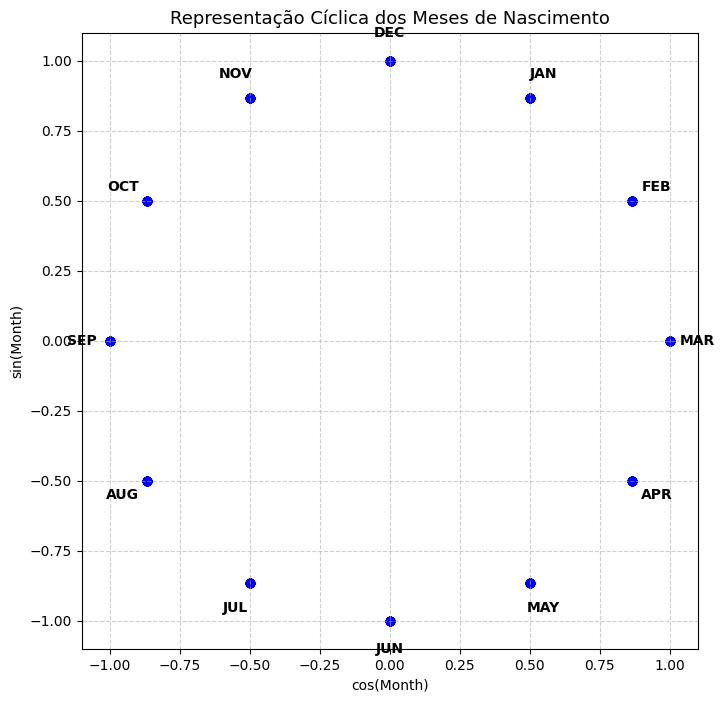

In [ ]:
# Plotar círculo
plt.figure(figsize=(8,8))
plt.scatter(db['cos_MOB'], db['sin_MOB'], color='blue', alpha=0.6)

# Adicionar rótulos dos meses (1–12)
for month, num in month_map.items():
    angle = 2 * np.pi * num / months_in_year
    angle = -1 * (angle - np.pi/2)
    x = np.cos(angle)
    y = np.sin(angle)
    plt.text(x * 1.1, y * 1.1, month, ha='center', va='center', fontsize=10, weight='bold')

# Ajustes visuais
plt.title('Representação Cíclica dos Meses de Nascimento', fontsize=13)
plt.xlabel('cos(Month)')
plt.ylabel('sin(Month)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369 entries, 0 to 467
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Candidate ID                           369 non-null    int64  
 1   Name                                   369 non-null    object 
 2   Number of characters in Original Name  369 non-null    int64  
 3   Year of Birth                          369 non-null    object 
 4   Gender                                 369 non-null    object 
 5   State (Location)                       369 non-null    object 
 6   10th percentage                        369 non-null    float64
 7   12th percentage                        369 non-null    float64
 8   10th Completion Year                   369 non-null    object 
 9   12th Completion year                   369 non-null    object 
 10  Degree of study                        369 non-null    object 
 11  Specializat

## Base Classification

In [ ]:
X = db.drop(columns=['Candidate ID', 'Name', 'Performance'])
y = db.Performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [ ]:
ohe_cols = ['Gender', 'State (Location)']
ord_cols = ['Year of Birth', '10th Completion Year', '12th Completion year', 'Degree of study', 'Specialization in study', 'Year of Completion of college']

# Colunas de imputação
impute_cols = ['Quantitative Ability 1', 'Domain Skills 1', 'Analytical Skills 1']

# Imputer (rodando apenas nas 3 colunas)
imputer = ColumnTransformer([
    ("imputer", KNNImputer(), impute_cols),
], remainder='passthrough')

# Pré-processamento completo
preprocessing = ColumnTransformer([
    ("imputer", KNNImputer(), impute_cols),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist", min_frequency=0.01, drop=None), ohe_cols),
    ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1, encoded_missing_value=-2), ord_cols),
    ("winsor", Winsorizer(capping_method='iqr', tail='both', fold=1.5), make_column_selector(dtype_exclude="object")),
    ("scaler", StandardScaler(), make_column_selector(dtype_exclude="object"))
], remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer', KNNImputer(),
                                 ['Quantitative Ability 1', 'Domain Skills 1',
                                  'Analytical Skills 1']),
                                ('ohe',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               min_frequency=0.01,
                                               sparse_output=False),
                                 ['Gender', 'State (Location)']),
                                ('ord',
                                 OrdinalEncoder(encoded_missing_value=-2,
                                                handle_unknown='use_encoded_value...
                                 ['Year of Birth', '10th Completion Year',
                                  '12th Completion year', 'Degree of study',
                                  'Specialization in study',
                                  'Year of Completion of college']),
                                ('winsor',
                                 Winsorizer(capping_method='iqr', fold=1.5,
                                            tail='both'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ceaab235f10>),
                                ('scaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ceaab236e70>)])

In [ ]:
pipe_log = Pipeline([
    ("preprocess", preprocessing),
    ("model", LogisticRegression(max_iter=5000))
])

pipe_log

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer', KNNImputer(),
                                                  ['Quantitative Ability 1',
                                                   'Domain Skills 1',
                                                   'Analytical Skills 1']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.01,
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'State (Location)']),
                                                 ('ord',
                                                  OrdinalEncoder(encoded_missing_value=-2,
                                                                 han...
                                                   'Specialization in study',
                                                   'Year of Completion of '
                                                   'college']),
                                                 ('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ceaab235f10>),
                                                 ('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ceaab236e70>)])),
                ('model', LogisticRegression(max_iter=5000))])

In [ ]:
pipe_dt = Pipeline([
    ("preprocess", preprocessing),
    ("model", DecisionTreeClassifier(random_state=42))
])

pipe_dt

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer', KNNImputer(),
                                                  ['Quantitative Ability 1',
                                                   'Domain Skills 1',
                                                   'Analytical Skills 1']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.01,
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'State (Location)']),
                                                 ('ord',
                                                  OrdinalEncoder(encoded_missing_value=-2,
                                                                 han...
                                                   'Specialization in study',
                                                   'Year of Completion of '
                                                   'college']),
                                                 ('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ceaab235f10>),
                                                 ('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ceaab236e70>)])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [ ]:
cv_log = cross_validate(pipe_log, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])
print(cv_log['test_accuracy'].mean())
print(cv_log['test_precision'].mean())
print(cv_log['test_recall'].mean())
print(cv_log['test_f1'].mean())

0.8835585585585586
0.61
0.195
0.2733333333333333


In [ ]:
cv_dt = cross_validate(pipe_dt, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])
print(cv_dt['test_accuracy'].mean())
print(cv_dt['test_precision'].mean())
print(cv_dt['test_recall'].mean())
print(cv_dt['test_f1'].mean())

In [ ]:
# Modelos a comparar
modelos = {
  "Logistic Regression": LogisticRegression(max_iter=5000),
  "Decision Tree": DecisionTreeClassifier(random_state=42),
  "Random Forest": RandomForestClassifier(random_state=42),
  "Gradient Boosting": GradientBoostingClassifier(random_state=42),
  "SVM": SVC(),
  "KNN": KNeighborsClassifier()
}

# Função auxiliar para avaliar cada modelo com cross-validation
def avaliar_modelos(modelos, X, y, preprocessing, cv=10):
    resultados = []

    for nome, modelo in modelos.items():
        pipe = Pipeline([
            ("preprocess", preprocessing),
            ("model", modelo)
        ])

        scores = cross_validate(pipe, X, y, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs=-1)

        resultados.append({
            "Modelo": nome,
            "Acurácia": np.mean(scores['test_accuracy']),
            "Precisão": np.mean(scores['test_precision']),
            "Recall": np.mean(scores['test_recall']),
            "F1-Score": np.mean(scores['test_f1'])
        })

    df_resultados = pd.DataFrame(resultados)
    return df_resultados.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

# Rodar avaliação
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
df_resultados = avaliar_modelos(modelos, X, y, preprocessing, cv)

# Destacar o melhor resultado (F1-Score)
melhor = df_resultados.iloc[0]
print(f"🏆 Melhor modelo: {melhor['Modelo']} (F1-Score = {melhor['F1-Score']:.4f})\n")

# Mostrar tabela formatada (para apresentações)
print(tabulate(df_resultados, headers='keys', tablefmt='fancy_grid', floatfmt=".4f"))

# Balanceamento

In [ ]:
# Balanceamento com SMOTE (Oversampling)

# Pipeline final com SMOTE
pipe_log_smote = ImbPipeline([
    ("preprocess", preprocessing),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=10000))
])

pipe_log_smote

In [ ]:
# Pipeline final com SMOTE
pipe_dt_smote = ImbPipeline([
    ("preprocess", preprocessing),
    ("smote", SMOTE(random_state=42)),
    ("model", DecisionTreeClassifier())
])

pipe_dt_smote

In [ ]:
# Cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_log_smote = cross_validate(pipe_log_smote, X, y, cv=cv,
                              scoring=['accuracy', 'precision', 'recall', 'f1'])

print("Accuracy:", cv_log_smote['test_accuracy'].mean())
print("Precision:", cv_log_smote['test_precision'].mean())
print("Recall:", cv_log_smote['test_recall'].mean())
print("F1:", cv_log_smote['test_f1'].mean())

In [ ]:
# Cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_dt_smote = cross_validate(pipe_dt_smote, X, y, cv=cv,
                              scoring=['accuracy', 'precision', 'recall', 'f1'])

print("Accuracy:", cv_dt_smote['test_accuracy'].mean())
print("Precision:", cv_dt_smote['test_precision'].mean())
print("Recall:", cv_dt_smote['test_recall'].mean())
print("F1:", cv_dt_smote['test_f1'].mean())

In [ ]:
# Antes do SMOTE
print("Distribuição original:", Counter(y))

pipe_smote = ImbPipeline([
    ("preprocess", preprocessing),
    ("smote", SMOTE(random_state=42)),
])

# Aplicando o mesmo SMOTE da pipeline
X_res, y_res = pipe_smote.fit_resample(X, y)

# Depois do SMOTE
print("Distribuição após SMOTE:", Counter(y_res))

# Cálculo da diferença
gerados = len(y_res) - len(y)
print(f"🔹 Total de amostras geradas pelo SMOTE: {gerados}")
print(f"🔹 Aumento percentual: {100 * gerados / len(y):.2f}%")

In [ ]:
# Modelos a comparar
modelos = {
  "Logistic Regression": LogisticRegression(max_iter=5000),
  "Decision Tree": DecisionTreeClassifier(random_state=42),
  "Random Forest": RandomForestClassifier(random_state=42),
  "Gradient Boosting": GradientBoostingClassifier(random_state=42),
  "SVM": SVC(),
  "KNN": KNeighborsClassifier()
}

# Função auxiliar para avaliar cada modelo com cross-validation
def avaliar_modelos(modelos, X, y, preprocessing, cv=10):
    resultados = []

    for nome, modelo in modelos.items():
        pipe_smote = ImbPipeline([
            ("preprocess", preprocessing),
            ("smote", SMOTE(random_state=42)),
            ("model", modelo)
        ])

        scores = cross_validate(pipe_smote, X, y, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs=-1)

        resultados.append({
            "Modelo": nome,
            "Acurácia": np.mean(scores['test_accuracy']),
            "Precisão": np.mean(scores['test_precision']),
            "Recall": np.mean(scores['test_recall']),
            "F1-Score": np.mean(scores['test_f1'])
        })

    df_resultados = pd.DataFrame(resultados)
    return df_resultados.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

# Rodar avaliação
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
df_resultados = avaliar_modelos(modelos, X, y, preprocessing, cv)

# Destacar o melhor resultado (F1-Score)
melhor = df_resultados.iloc[0]
print(f"🏆 Melhor modelo: {melhor['Modelo']} (F1-Score = {melhor['F1-Score']:.4f})\n")

# Mostrar tabela formatada (para apresentações)
print(tabulate(df_resultados, headers='keys', tablefmt='fancy_grid', floatfmt=".4f"))

### Decision Tree Visualization

In [ ]:
pipe_smote = ImbPipeline([
            ("preprocess", preprocessing),
            ("smote", SMOTE(random_state=42)),
            ("model", modelos['Decision Tree'])
        ])
pipe_smote.fit(X, y)
modelo_treinado = pipe_smote.named_steps["model"]

try:
    feature_names = pipe_smote.named_steps["preprocess"].get_feature_names_out()
except:
    feature_names = X.columns

plt.figure(figsize=(16,8))
tree.plot_tree(
    modelo_treinado,
    feature_names=feature_names,
    class_names=[str(c) for c in modelo_treinado.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

# GridSearch

In [ ]:
# Define os parâmetros que quer testar
param_grid = {
    # parâmetros do modelo
    "model__C": [0.1, 1, 10],  # para LogisticRegression
    "model__penalty": ["l2"],  # L1 não funciona com solver padrão
    "model__solver": ["lbfgs"],

    # parâmetros do SMOTE (opcional)
    "smote__k_neighbors": [3, 5, 7]
}

# Cria o GridSearchCV
grid_search = GridSearchCV(
    estimator=pipe_log_smote,  # pipeline que criamos
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',   # métrica principal
    n_jobs=-1
)

# Executa
grid_search.fit(X, y)

# Resultados
print("Melhor F1:", grid_search.best_score_)
print("Melhos parâmetros:", grid_search.best_params_)

# Redução de Dimensionalidade

In [ ]:
db.head()

In [ ]:
db.info()

In [ ]:
X = db.drop(columns=['Candidate ID', 'Name', 'Performance'])
y = db.Performance

In [ ]:
# Colunas categóricas
categorical_cols = ['Year of Birth', 'Gender', 'State (Location)', '10th Completion Year', '12th Completion year',
                    'Degree of study', 'Specialization in study', 'Year of Completion of college']

# Colunas de imputação
impute_cols = ['Quantitative Ability 1', 'Domain Skills 1', 'Analytical Skills 1']

# Imputer (rodando apenas nas 3 colunas)
imputer = ColumnTransformer([
    ("imputer", KNNImputer(), impute_cols),
], remainder='passthrough')

# Pré-processamento completo
preprocessing = ColumnTransformer([
    ("imputer", KNNImputer(), impute_cols),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_cols),
    ("scaler", RobustScaler(), make_column_selector(dtype_exclude="object"))
], remainder='passthrough')

preprocessing

In [ ]:
preprocessing.fit(X)

# Recuperar nomes das colunas após todas as transformações
feature_names = preprocessing.get_feature_names_out()

print(len(feature_names))
print(feature_names[:20])

In [ ]:
X_transformed = preprocessing.transform(X)
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)
X_transformed_df.head()

In [ ]:
pipe = Pipeline([
    ("preprocessing", preprocessing),
    ("model", RandomForestClassifier(random_state=42))
])

pipe.fit(X, y)

# Pegar nomes das features após preprocessamento
feature_names = pipe.named_steps['preprocessing'].get_feature_names_out()

# Importâncias das features
importances = pipe.named_steps['model'].feature_importances_

# Organização
importances_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

importances_df.head(20)

In [ ]:
top_features = importances_df.head(10)["feature"].values
print(top_features)

# Aplica o pré-processamento
X_transformed = preprocessing.transform(X)
feature_names = preprocessing.get_feature_names_out()

# Cria DataFrame com todas as colunas transformadas
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

# Seleciona apenas as top features
X_top = X_transformed_df[top_features]

print(X_top.shape)
X_top.head()

In [ ]:
# Cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_log_smote = cross_validate(DecisionTreeClassifier(), X_top, y, cv=cv,
                              scoring=['accuracy', 'precision', 'recall', 'f1'])

print("Accuracy:", cv_log_smote['test_accuracy'].mean())
print("Precision:", cv_log_smote['test_precision'].mean())
print("Recall:", cv_log_smote['test_recall'].mean())
print("F1:", cv_log_smote['test_f1'].mean())